# Indmat prosjekt
###### Liva Berge Flo, André Pettersen-Dahl, Herman Neple

#### Oppgave 1

1.1

Vi ser på et eksempel på et datasett som kan trene en transformermodell som forsøker å predikere et heltall $d$, hvor $d = a \cdot b + c$. Her er $a$ og $c$ tosifrede heltall og $b$ er et ettsifret heltall

\begin{align*}
    \text{La } r &= 2,   a = 28,  
 b = 4,   c = 18,   d = 130, \\
    \text{da har vi } x &= [2,8,4,1,8,1,3], y = [1,3,0], \\
    \text{modellen gir oss } \hat{z} &= [\hat{z}_0, \ldots, \hat{z}_6] = f_{\theta}([2,8,4,1,8,1,3]), \\
    \text{vi ønsker å finne $\theta$ slik at } \hat{y} &= [\hat{z}_{4}, \hat{z}_{5}, \hat{z}_{6}] = [1,3,0].\\
\end{align*}

1.2

Vi ser videre på et eksempel på hvordan transformermodellen $f_{\theta}$ kan predikere tallet $d$ for samme type problem.


\begin{align*}
    \text{La } r &= 2, a = 18, b = 3, c = 22 \\
    \text{da har vi } x^{(0)} &= [1,8,3,2,2], & [\hat{z}_{0}^{(0)},\hat{z}_{1}^{(0)},\hat{z}_{2}^{(0)},\hat{z}_{3}^{(0)},\hat{z}_{4}^{(0)},\textcolor{red}{\hat{z}_{5}^{(0)}}] = f_\theta(x^{(0)}), \\
    x^{(1)} &= [1,8,3,2,2,\textcolor{red}{\hat{z}_{5}^{(0)}}], & [\hat{z}_{0}^{(1)},\ldots, \textcolor{blue}{\hat{z}_{6}^{(1)}}] = f_\theta(x^{(1)}), \\ 
    x^{(2)} &= [1,8,3,2,2,\textcolor{red}{\hat{z}_{5}^{(0)}},\textcolor{blue}{\hat{z}_{6}^{(1)}}], & [\hat{z}_{0}^{(1)},\ldots, \textcolor{gold}{\hat{z}_{7}^{(2)}}] = f_\theta(x^{(2)}), \\
    x^{(3)} &= [1,8,3,2,2,\textcolor{red}{\hat{z}_{5}^{(0)}},\textcolor{blue}{\hat{z}_{6}^{(1)}},\textcolor{gold}{\hat{z}_{7}^{(2)}}] \\
    \hat{y} &= [\textcolor{red}{\hat{z}_{5}^{(0)}},\textcolor{blue}{\hat{z}_{6}^{(1)}},\textcolor{gold}{\hat{z}_{7}^{(2)}}]. \\
\end{align*}

Siden transformermodellen beregner siste siffer i et addisjonsproblem først, vil tallet $d = \textcolor{gold}{\hat{z}_{7}^{(2)}}\textcolor{blue}{\hat{z}_{6}^{(1)}}\textcolor{red}{\hat{z}_{5}^{(0)}}$

1.3

La $m = 5$ og $y = [4,3,2,1]$. Vi bruker cross-entropy som objektfunksjon $\mathcal{L}$, og ønsker å finne en sannsynlighetsfordeling $\hat Y$ som gir $\mathcal{L}(\theta, \mathcal{D}) = 0$.

Vi får altså at 

$$Y = \left[
\begin{array}{cccc}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0 
\end{array}
\right]$$

når vi representerer $y$ som en matrise, ved å benytte onehot.


Cross-entropy vil i vårt tilfelle se slik ut:


\begin{align*}
\mathcal{L}(\theta, \mathcal{D}) &= -\frac{1}{4} \sum_{i=0}^{0} \sum_{j=0}^{4} \log Y_{kj}^{(i)}
\end{align*}

hvor vi kun summerer opp til $D = 0$, siden vi kun har ett datasett og summerer opp til $n = 4$, fordi vi har fire elementer i $y$.

Siden vi ønsker at $\mathcal{L}(\theta, \mathcal{D}) = 0$, vil vi at alle $Y_{kj}^{(i)} = 1$, slik at logaritmen blir 0.



$$\hat Y = \left[
\begin{array}{cccc}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0 
\end{array}
\right]$$

Altså, kan vi observere at:


\begin{align*}
Y_{4,0} &= 1 \\
Y_{3,1} &= 1 \\
Y_{2,2} &= 1 \\
Y_{1,3} &= 1 \\
\end{align*}

Resten av elementene i $Y$ er null. Dermed kan vi forenkle uttrykket for kryssentropien:

\begin{align*}
\mathcal{L}(\theta, \mathcal{D}) &= -\frac{1}{4} \left( \log Y_{4,0} + \log Y_{3,1} + \log Y_{2,2} + \log Y_{1,3} \right) \\
&= -\frac{1}{4} \left( \log 1 + \log 1 + \log 1 + \log 1 \right) \\
&= -\frac{1}{4} \cdot 4 \cdot \log 1 \\
&= -\frac{4}{4} \cdot 0 \\
&= 0
\end{align*}


Så vi ser at $ \mathcal{L}(\theta, \mathcal{D}) = 0 $, som forventet.

Vi må i dette tilfellet ha at $\hat y = y$. Dette kan man se dersom man utfører operasjonen $\text{argmax}_{\text{col}}(\hat Y)$. Det kan også observeres at $\hat Y = Y$.

1.4

Vi kan begynne med å se på settet av parametere
\begin{align*}
\theta = \{ W_E, W_P, W_U, \{W_O^{(l)}, W_V^{(l)}, W_Q^{(l)}, W_K^{(l)}, W_1^{(l)}, W_2^{(l)}\}_{l=0}^{L-1} \}
\end{align*}
Antall parametere blir da

\begin{align*}
n_{w} &=  d \cdot m + d \cdot n_{\text{max}} + d \cdot m + L\cdot \{ 4 ( k \cdot d ) + 2 (p\cdot d)\} \\
&= 2(d\cdot m) + d\cdot n_{\text{max}} + L\cdot \{ 4 ( k \cdot d ) + 2 (p\cdot d)\}
\end{align*}

1.5

Vi starte med å gå manuelt gjennom hele transformeralgoritmen med de gitte verdiene.

\begin{align*}
x &= [1], \text{       } m = 2 \\
X &= \text{onehot}(x) = 
\begin{bmatrix}
0 \\
1 \\
\end{bmatrix} \\
W_{E} &= \begin{bmatrix}
    1 & 0 \\
    0 & \alpha \\
\end{bmatrix}
W_{P} = \begin{bmatrix}
    1  \\
    0  \\
\end{bmatrix} \\
z_{0} &= \begin{bmatrix}
    1 & 0 \\
    0 & \alpha \\
\end{bmatrix}
\begin{bmatrix}
    0 \\
    1 \\
\end{bmatrix} + \begin{bmatrix}
    1 \\
    0 \\
\end{bmatrix}
= \begin{bmatrix}
    0 \\
    \alpha \\
\end{bmatrix}
+ \begin{bmatrix}
    1 \\
    0 \\
\end{bmatrix}
= \begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix} \\
\end{align*}

\begin{align*}
z_{\frac{1}{2}} &= z_0 + W_{O}^{T}W_{V}z_{0}A(z_{0})\\ &= z_{0} + W_{O}^{T}W_{V}z_{0}\text{ softmax}_{\text{col }}(z_{0}^{T}W_{Q}^{T}W_{K}z_{0} + D) \\
&= \begin{bmatrix}
    0 \\
    1 \\
\end{bmatrix} + \begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
\end{bmatrix} \begin{bmatrix}
    1 & 0 \\
    1 & 1 \\
\end{bmatrix} \begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix} \text{softmax}_{\text{col } }(\begin{bmatrix}
    1 & \alpha
\end{bmatrix}\begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
\end{bmatrix}\begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
\end{bmatrix}\begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix} + 0) \\
&= \begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix}+\begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix}\text{softmax}_{\text{col }}(1+\alpha^2) \\
&= 2 \begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix}
\end{align*}

\begin{align*}
z_1 &= z_{\frac{1}{2}} + W_{2}^{T}\sigma(W_1 z_{\frac{1}{2}})\\
&= 2_{\frac{1}{2}} + W_{2}^{T}\text{max}(0,W_1 z_{\frac{1}{2}})\\
&= 2\begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix}+\begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
\end{bmatrix}\text{max}\Bigg(0, \begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
\end{bmatrix}2\begin{bmatrix}
    1 \\
    \alpha \\
\end{bmatrix}\Bigg)\\
&= 4\begin{bmatrix}
    1\\
    \alpha \\
\end{bmatrix}
\end{align*}

\begin{align*}
Z &= \text{softmax}_{\text{col}}(W_{U}^{T}z_{1})\\
&= \text{softmax}_{\text{col}}\bigg(4\begin{bmatrix}
        1 \\
        \alpha \\
    \end{bmatrix}\bigg)\\
    &= \begin{bmatrix}
        \frac{e^{4}}{e^{4}+e^{4\alpha}} \\
        \frac{e^{4\alpha}}{e^{4}+e^{4\alpha}} \\
    \end{bmatrix}
    = \frac{1}{e^{4}+e^{4\alpha}}\begin{bmatrix}
        e^{4} \\
        e^{4\alpha} \\
    \end{bmatrix}
\end{align*}

Det kan observeres at $\text{argmax}_{\text{col}}$ vil returnere $\hat{z} = [1]$ dersom $Z_{10}$ er størst. 
\begin{align*}
e^{4\alpha} > e^{4} \implies \alpha > 1\\
\Box
\end{align*}

#### Oppgave 2

#### Oppgave 3.1

In [1]:
from layers import *
from neural_network import NeuralNetwork
from utils import onehot
import numpy as np
from data_generators import get_train_test_sorting
import matplotlib.pyplot as plt

For å teste om lagene vi har implementert fungerer, kan vi manuelt kjøre gjennom algoritmen. Vi starter med å initalisere lagene til det nevrale nettverk.

In [2]:
#definerer variabler
r = 4
m = 4

d = 10
k = 5
p = 15
L = 2

embed = EmbedPosition(9,m,d)
att1 = Attention(d,k)
ff1 = FeedForward(d,p)
un_embed = LinearLayer(d,m)
softmax = Softmax()
loss = CrossEntropy()

Vi kan videre gi nettverket vårt en input, la oss f.eks late som vi prøver å få modellen til å sortere tallene.

In [3]:
x = np.array([[0,1,2]])
X = onehot(x, m)

z0 = embed.forward(X)
z11 = att1.forward(z0)
z12 = ff1.forward(z11)
z2 = un_embed.forward(z12)
Z = softmax.forward(z2)

Vi kan så teste om vi fikk riktig output, som i dette tilfelle burde være at det er $0$ på siste element. Om vi har riktig output skulle loss funksjonen vårt bli 0.

In [4]:
y = np.array([[0]])
L = loss.forward(Z,y)

print(L)

1.3443252276879822


Dette fungerte åpenbart ikke enda. Etter å ha kjørt en forward pass, er det fint å teste backwardfunksjonen til lagene. Vi starter da med å beregne den deriverte av loss funksjonen

In [5]:
dLdz = loss.backward()
d0 = softmax.backward(dLdz)
d1 = un_embed.backward(d0)
d21 = ff1.backward(d1)
d22 = att1.backward(d21)
d3 = embed.backward(d22)

#### Oppgave 3.2

Vi lager en generell funksjon som vil trene nettverket vårt

In [6]:
def test_Adam(nn: NeuralNetwork, x_data, y_data, y_length, n_iters, step_size, m):
    n_batches = x_data.shape[0]
    mean_losses = np.zeros(n_iters)
    for j in range(n_iters):
        losses = []
        for i in range(n_batches):
            x = x_data[i]
            y = y_data[i][:,4:9]

            X = onehot(x,m)
            Z = nn.forward(X)

            losses.append(loss.forward(Z,y))
            dLdZ = loss.backward()
            nn.backward(dLdZ)
            nn.step_Adam(step_size)
        mean_loss = np.mean(losses)
        print("Iterasjon ", str(j+1), " L = ",mean_loss, "")
        mean_losses[j] = mean_loss
    return mean_losses

#### Oppgave 3.3

For oppgaven med sortering av 0 og 1

In [7]:
#definerer variabler
r = 5
m = 2

d = 10
k = 5
p = 15
L = 2

embed = EmbedPosition(9,m,d)
att1 = Attention(d,k)
att2 = Attention(d,k)
ff1 = FeedForward(d,p)
ff2 = FeedForward(d,p)
un_embed = LinearLayer(d,m)
softmax = Softmax()
loss = CrossEntropy()

nn = NeuralNetwork([embed, att1, ff1, att2, ff2, un_embed, softmax])

data = get_train_test_sorting(r, m, samples_per_batch=250,n_batches_train=20, n_batches_test=4)

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

La oss prøve å trene!

In [8]:
losses = test_Adam(nn, data['x_train'], data['y_train'], 4, 100, 0.001, m)

Iterasjon  1  L =  0.708421212781093 
Iterasjon  2  L =  0.6790844305503894 
Iterasjon  3  L =  0.632840927056048 
Iterasjon  4  L =  0.5465901257431437 
Iterasjon  5  L =  0.4061899270886776 
Iterasjon  6  L =  0.24330773679083556 
Iterasjon  7  L =  0.11905436513171594 
Iterasjon  8  L =  0.1073934913276395 
Iterasjon  9  L =  0.07917751033710635 
Iterasjon  10  L =  0.04465859572243914 
Iterasjon  11  L =  0.02267232296933385 
Iterasjon  12  L =  0.014503885689475526 
Iterasjon  13  L =  0.008916549771474862 
Iterasjon  14  L =  0.00550227229484305 
Iterasjon  15  L =  0.0035843748976850482 
Iterasjon  16  L =  0.0021294389336003203 
Iterasjon  17  L =  0.0013262010736851328 
Iterasjon  18  L =  0.0009209885934430305 
Iterasjon  19  L =  0.0006799694863177955 
Iterasjon  20  L =  0.0005286393736274502 
Iterasjon  21  L =  0.00042360582273245787 
Iterasjon  22  L =  0.0003465357806220263 
Iterasjon  23  L =  0.000288925484523351 
Iterasjon  24  L =  0.00024520411965462015 
Iterasjon 

Og så kan vi plotte hvordan lossfunksjonen har endret seg gjennom iterasjonene

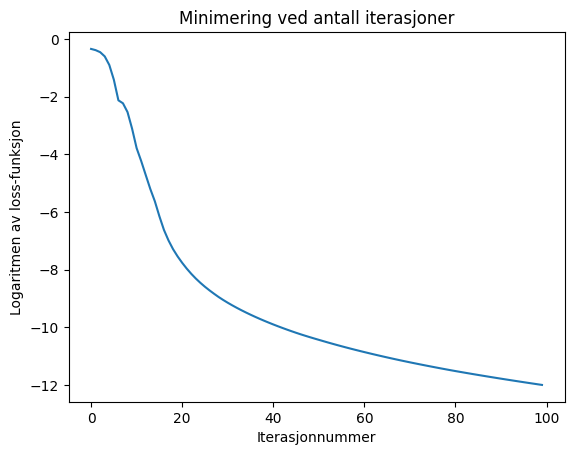

<Figure size 1500x1200 with 0 Axes>

In [9]:
plt.plot(np.arange(0,100), np.log(losses))
plt.xlabel("Iterasjonnummer")
plt.ylabel("Logaritmen av loss-funksjon")
plt.title("Minimering ved antall iterasjoner")
plt.figure(figsize=(15,12))
plt.show()

#### Tester for en iterasjon for å se om den greier å predikere neste verdi

In [10]:
x = np.array([[1, 0 ,0, 1, 0]])
X = onehot(x, m)

#forward pass
Z = nn.forward(X)
z_hat = np.argmax(Z, axis=1)

print(z_hat)

[[1 0 0 1 0]]


Når vi sender inn arrayet [1, 0, 0, 1, 1], vil vi ved å sende det gjennom algoritmen få predikert den første predikerte verdien som det siste elementet i det returnerte arrayet, som beskrevet i avsnitt 1.2. Siden algoritmen sorterer verdiene i arrayet bestående av 0 og 1, forventer vi at det første sifferet i det sorterte arrayet blir 0. Deretter, for å predikere resten av sekvensen, mater vi inn det siste elementet i det predikerte arrayet tilbake inn i arrayet vi sender gjennom 'forward'-steget, og fortsetter prediksjonen derfra.

Videre er det nyttig med en funksjon som kan gir inn testdataen til nettverket vårt, og så en funksjon som teller antall riktige prediksjoner.

In [11]:
#funksjon for å predikere data
def predict(nn: NeuralNetwork, x_test, m, r):
    predictions = []
    for i in range(x_test.shape[0]):
        x = x_test[i]
        for n in range(r):
            X = onehot(x, m)
            Z = nn.forward(X)
            z = np.argmax(Z, axis=1)
            np.append(x, z[:,-1:], axis=1)
        predictions.append(x[:,-r:])
    return np.array(predictions)

def countCorrect(y_hat, y):
    batches = y_hat.shape[0]
    samples = y_hat[0].shape[0]

    counter = 0
    total = samples*batches

    for b in range(batches):
        for i in range(samples):
            if np.sum(y_hat[b,i] - y[b,i]) == 0:
                counter += 1

    return counter, total, (counter/total)*100


Så kan vi se hvorvidt nettverket vårt klarer å sortere eller ikke.

In [13]:

y_hats = predict(nn, x_test, 2, 5)


corr, total, percent = countCorrect(y_hats, y_test)

print("Antall rette prediksjoner:", corr)
print("Totalt antall prediksjoner:", total)
print("Prosentvis riktige predikasjoner:", percent, "%")


Antall rette prediksjoner: 525
Totalt antall prediksjoner: 1000
Prosentvis riktige predikasjoner: 52.5 %


Når to forskjellige verdier kan forekomme på fem ulike steder, resulterer dette i totalt $32$ mulige kombinasjoner ($2^5 = 32$). Denne mangfoldigheten gjør det praktisk talt umulig å teste algoritmen vår med nye sekvenser. Ideelt sett ville tapet tendert mot null, og prediksjonene ville vært korrekte hver gang, siden algoritmen burde gjenkjenne det riktige svaret ($y$) i stedet for å forutsi neste sekvens. Dette antyder at vektene våre kanskje ikke er optimalt tilpasset.

In [ ]:
#definerer variabler
r = 7
m = 5
n_max = 2*r-1

d = 20
k = 10
p = 25
L = 2

embed = EmbedPosition(n_max,m,d)
att1 = Attention(d,k)
ff1 = FeedForward(d,p)
un_embed = LinearLayer(d,m)
softmax = Softmax()
loss = CrossEntropy()

nn = NeuralNetwork([embed, att1, ff1, un_embed, softmax])

data = get_train_test_sorting(r, m, samples_per_batch=250,n_batches_train=10, n_batches_test=4)

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']


In [ ]:
plt.plot(np.arange(0,300), np.log(test_Adam(data['x_train'], data['y_train'], 300, 0.1,m)))
plt.xlabel("Iterasjonnummer")
plt.ylabel("Logaritmen av loss-funksjon")
plt.title("Minimering ved antall iterasjoner")
plt.figure(figsize=(15,12))
plt.show()

TypeError: test_Adam() missing 2 required positional arguments: 'step_size' and 'm'

In [ ]:
y_pred = predict(nn, x_test, r, m)
y_test = data['y_test']

correct_predictions = count_correct_predictions(y_pred, y_test)
print("Antall rette prediksjoner:", correct_predictions)
print("Totalt antall prediksjoner:", y_pred.shape[1])
print("Prosentvis riktige predikasjoner:", (correct_predictions/y_pred.shape[1])*100, "%")


ValueError: Size of label 'j' for operand 1 (5) does not match previous terms (10).

In [ ]:
from data_generators import get_train_test_addition
#definerer variabler
r = 6
m = 10
n_max = 3*r

d = 30
k = 20
p = 40
L = 3


data = get_train_test_addition(2, samples_per_batch=250,n_batches_train=20, n_batches_test=4)

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

In [ ]:
plt.plot(np.arange(0,300), np.log(test_Adam(data['x_train'], data['y_train'], 300, 0.1,m)))
plt.xlabel("Iterasjonnummer")
plt.ylabel("Logaritmen av loss-funksjon")
plt.title("Minimering ved antall iterasjoner")
plt.figure(figsize=(15,12))
plt.show()

ValueError: Size of label 'j' for operand 1 (5) does not match previous terms (10).